In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits import mplot3d
from datetime import time

# Worksheet _ High _ 3

## Data preparation

### result1

In [ ]:
result1 = pd.read_csv("/content/drive/MyDrive/teamC/Hanbin/data/result1.csv")

In [ ]:
result1

,Unnamed: 0,student.id,year,date,p.id,cumulative_correct_1,cumulative_correct_2,cumulative_correct_3,cumulative_correct_4,cumulative_correct_5,cumulative_wrong_1,cumulative_wrong_2,cumulative_wrong_3,cumulative_wrong_4,cumulative_wrong_5,score
0,0,I100008,2020,20-11-07,20,0.0,8.0,1.0,1.0,0.0,0.0,3.0,5.0,1.0,1.0,3.954545
1,1,I100008,2020,20-11-14,27,0.0,14.0,7.0,3.0,0.0,0.0,4.0,9.0,8.0,2.0,3.958965
2,2,I100008,2020,20-11-16,12,0.0,17.0,14.0,4.0,0.0,0.0,4.0,10.0,8.0,2.0,4.702381
3,3,I100008,2020,20-11-18,20,0.0,19.0,20.0,13.0,0.0,0.0,4.0,11.0,10.0,2.0,5.848527
4,4,I100008,2020,20-11-20,2,0.0,20.0,20.0,13.0,0.0,0.0,4.0,12.0,10.0,2.0,5.802536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289690,289690,IB113,2021,21-01-23,18,2.0,10.0,20.0,5.0,0.0,0.0,4.0,9.0,8.0,0.0,6.035998
289691,289691,IB113,2021,21-03-19,30,3.0,15.0,29.0,9.0,0.0,0.0,7.0,16.0,9.0,0.0,6.296970
289692,289692,IB123,2021,21-02-18,140,8.0,40.0,43.0,6.0,1.0,0.0,12.0,23.0,5.0,2.0,8.341492
289693,289693,IB123,2021,21-03-30,143,10.0,63.0,87.0,22.0,1.0,1.0,22.0,51.0,24.0,2.0,7.862458


In [ ]:
result1 = result1[["student.id","date","score"]]
for i in range(len(result1)):
  result1["date"][i] = "20"+result1["date"][i]
result1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,student.id,date,score
0,I100008,2020-11-07,3.954545
1,I100008,2020-11-14,3.958965
2,I100008,2020-11-16,4.702381
3,I100008,2020-11-18,5.848527
4,I100008,2020-11-20,5.802536
...,...,...,...
289690,IB113,2021-01-23,6.035998
289691,IB113,2021-03-19,6.296970
289692,IB123,2021-02-18,8.341492
289693,IB123,2021-03-30,7.862458


In [ ]:
result1.to_csv("/content/drive/MyDrive/teamC/Geonwoo/result1.csv")

In [ ]:
result1 = pd.read_csv("/content/drive/MyDrive/teamC/Geonwoo/result1.csv")

### std_ws_score_date

In [ ]:
academy_student_workwheet_scoring_problem_problem_cpt = pd.read_csv("/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem_problem_cpt.csv").head(1000)

In [ ]:
academy_student_workwheet_scoring_problem_problem_cpt

In [ ]:
student_ws = academy_student_workwheet_scoring_problem_problem_cpt[["Unnamed: 0", "student.id", "s_ws.id", "s_ws.solve_datetime"]]
student_ws = student_ws.dropna(axis=0)
student_ws.columns = ["Unnamed: 0","student.id","s_ws.id","date"]
student_ws["date"] = pd.to_datetime(student_ws["date"])
student_ws['date'] = student_ws['date'].dt.date
student_ws['date'] = student_ws["date"].astype("string")
student_ws

In [ ]:
std_ws_score = pd.merge(student_ws, result1, on=["student.id","date"], how="inner")
std_ws_score = std_ws_score[["student.id","s_ws.id","date","score"]].drop_duplicates()
std_ws_score = std_ws_score.groupby(["student.id","date","score"]).count().reset_index()
std_ws_score["date"] = pd.to_datetime(std_ws_score["date"])

In [ ]:
std_ws_score_1 = std_ws_score.copy() # 2020-11-07 형태

In [ ]:
std_ws_score["date"] = std_ws_score["date"].astype("str") # 202011 형태

std_ws_score["date"] 는 string이 아니라 str

(string이랑 다르더라...)

string은 python에서 쓰는 용어. object는 pandas에서 씀.

std_ws_score_1["date"] 은 datetime

In [ ]:
for i in range(len(std_ws_score["date"])):
  std_ws_score["date"][i] = int(std_ws_score["date"][i][0:4]+std_ws_score["date"][i][5:7])

In [ ]:
std_ws_score # 월별 학습지 개수 합칠 때 씀

In [ ]:
std_ws_score_1 # 월별 마지막 date의 score 불러올 때 씀

In [ ]:
std_ws_score[["student.id","date","s_ws.id"]].groupby(["student.id","date"]).sum().reset_index()

In [ ]:
std_ws_score_1["year_month"] = std_ws_score["date"]

In [ ]:
std_ws_score_1

In [ ]:
std_ws_score_date = std_ws_score_1[["student.id","date","score","year_month"]].groupby(["student.id","year_month"]).max().reset_index()
std_ws_score_date["s_ws.id"] = std_ws_score[["student.id","date","s_ws.id"]].groupby(["student.id","date"]).sum().reset_index()["s_ws.id"]
std_ws_score_date = std_ws_score_date[["student.id","year_month","date","s_ws.id","score"]]
std_ws_score_date

In [ ]:
year_month = sorted(list(std_ws_score_date["year_month"].unique()))
inverted_year_month = list(range(10,35))
date = pd.DataFrame(year_month, inverted_year_month).reset_index()
date.columns=["inverted_year_month", "year_month"]

In [ ]:
std_ws_score_date = pd.merge(std_ws_score_date, date, on="year_month", how="left")

In [ ]:
std_ws_score_date = std_ws_score_date[["student.id","year_month","date","s_ws.id","score","inverted_year_month"]]
std_ws_score_date.to_csv("/content/drive/MyDrive/teamC/Geonwoo/std_ws_score_date.csv")

In [ ]:
std_ws_score_date = pd.read_csv("/content/drive/MyDrive/teamC/Geonwoo/std_ws_score_date.csv")

std_ws_score와 std_ws_score_1은 std_ws_score_date를 만들기 위한 중간 결과물일 뿐

std_ws_score_date만 있으면 됨

In [ ]:
std_ws_score_date

# 학생별, 월별로 푼 학습지 수와 score를 보여주는 것이라서 std_ws_score_date라고 부름

,Unnamed: 0,student.id,year_month,date,s_ws.id,score,inverted_year_month
0,0,I100008,202011,2020-11-30,27,8.793955,11
1,1,I100008,202012,2020-12-30,62,9.348183,12
2,2,I100008,202101,2021-01-30,22,9.377144,13
3,3,I100008,202102,2021-02-28,58,9.592617,14
4,4,I100008,202103,2021-03-29,16,9.134290,15
...,...,...,...,...,...,...,...
66667,66667,IB113,202101,2021-01-23,1,6.035998,13
66668,66668,IB113,202103,2021-03-19,2,6.296970,15
66669,66669,IB123,202102,2021-02-18,8,8.341492,14
66670,66670,IB123,202103,2021-03-30,10,7.862458,15


### long_students

In [ ]:
long_students = std_ws_score_date.groupby(["student.id"]).count().sort_values("score", ascending=False)
long_students = long_students.reset_index()
long_students

# 오랫동안 머문 학생들을 우선으로 보여주는 것이라서 long_students라고 부름

,student.id,Unnamed: 0,year_month,date,s_ws.id,score,inverted_year_month
0,I85362,25,25,25,25,25,25
1,I170093,25,25,25,25,25,25
2,I227861,25,25,25,25,25,25
3,I189225,25,25,25,25,25,25
4,I241911,25,25,25,25,25,25
...,...,...,...,...,...,...,...
15561,I257378,1,1,1,1,1,1
15562,I257379,1,1,1,1,1,1
15563,I340799,1,1,1,1,1,1
15564,I340798,1,1,1,1,1,1


In [ ]:
# 여기서 특정 학생의 std_ws_score_date를 잘라서 볼 수 있음.
# 아래 코드에서 가장 오른쪽 숫자에 k를 넣으면 long_students에서 위에서 k번째에 있는 학생의 std_ws_score_date를 잘라서 보여줌.

std_ws_score_date[std_ws_score_date["student.id"]==long_students["student.id"][12]]

,Unnamed: 0,student.id,year_month,date,s_ws.id,score,inverted_year_month
19030,19030,I234650,202010,2020-10-30,8,7.821429,10
19031,19031,I234650,202011,2020-11-30,13,6.561263,11
19032,19032,I234650,202012,2020-12-30,8,5.873996,12
19033,19033,I234650,202101,2021-01-29,12,5.831337,13
19034,19034,I234650,202102,2021-02-24,15,5.572139,14
19035,19035,I234650,202103,2021-03-31,12,6.115701,15
19036,19036,I234650,202104,2021-04-23,14,6.000923,16
19037,19037,I234650,202105,2021-05-28,10,6.119887,17
19038,19038,I234650,202106,2021-06-14,4,6.125226,18
19039,19039,I234650,202107,2021-07-28,8,6.159000,19


## Visualization

In [ ]:
# 함수 정의

def plot3d(nums_lst):
  fig = plt.figure(figsize=(12,9))
  ax = plt.axes(projection='3d')
  colors = ["r","g","b","c","m","y","k","magenta"]

  std_ws_score_date_target = std_ws_score_date[std_ws_score_date["student.id"].isin(list(long_students["student.id"][nums_lst]))]

  for i in nums_lst:
    globals()["x{}".format(i)] = list(std_ws_score_date[std_ws_score_date["student.id"]==long_students["student.id"][i]]["s_ws.id"])
    globals()["y{}".format(i)] = list(std_ws_score_date[std_ws_score_date["student.id"]==long_students["student.id"][i]]["inverted_year_month"])
    globals()["z{}".format(i)] = list(std_ws_score_date[std_ws_score_date["student.id"]==long_students["student.id"][i]]["score"])
    
  ax.set_xlabel("count")
  ax.set_ylabel("year_month")
  ax.set_zlabel("score")
  plt.xlim([0,95])
  ax.set_zticks((0,15))

  for i in range(len(nums_lst)):
    ax.plot3D(globals()["x{}".format(nums_lst[i])], globals()["y{}".format(nums_lst[i])], globals()["z{}".format(nums_lst[i])], color=colors[i], label = nums_lst[i])
  
  ax.legend()

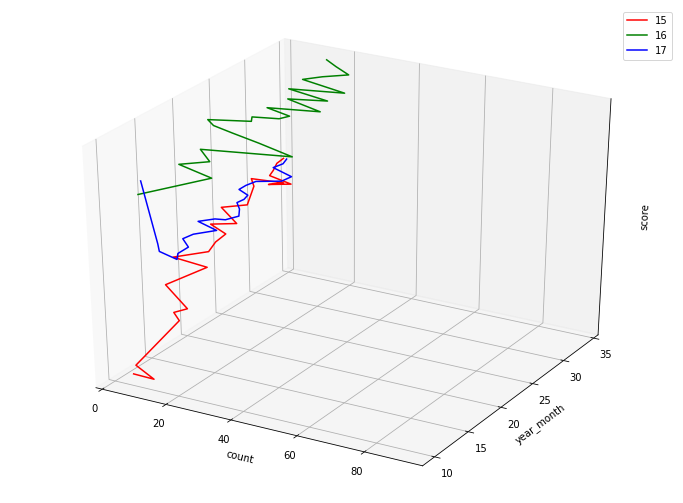

In [ ]:
plot3d([15,16,17])

# plot3d([2,3]) 하면 long_students에서 위에서 2번째, 3번째있는 학생의 그림을 겹쳐서 그려줌
# 최대 8명까지. 더 늘리고 싶으면 함수 정의에서 colors에 색깔 더 추가하면 됨.

# 너무 많으면 보기가 힘들어서 3명씩 잘라서 [0,1,2] 넣어서 첫 3명 보고 [3,4,5] 넣어서 다음 3명 보고~ 이렇게 활용해도 됨.

In [ ]:
from sklearn import linear_model

6.978623891653513 [0.08605607 0.02085055]


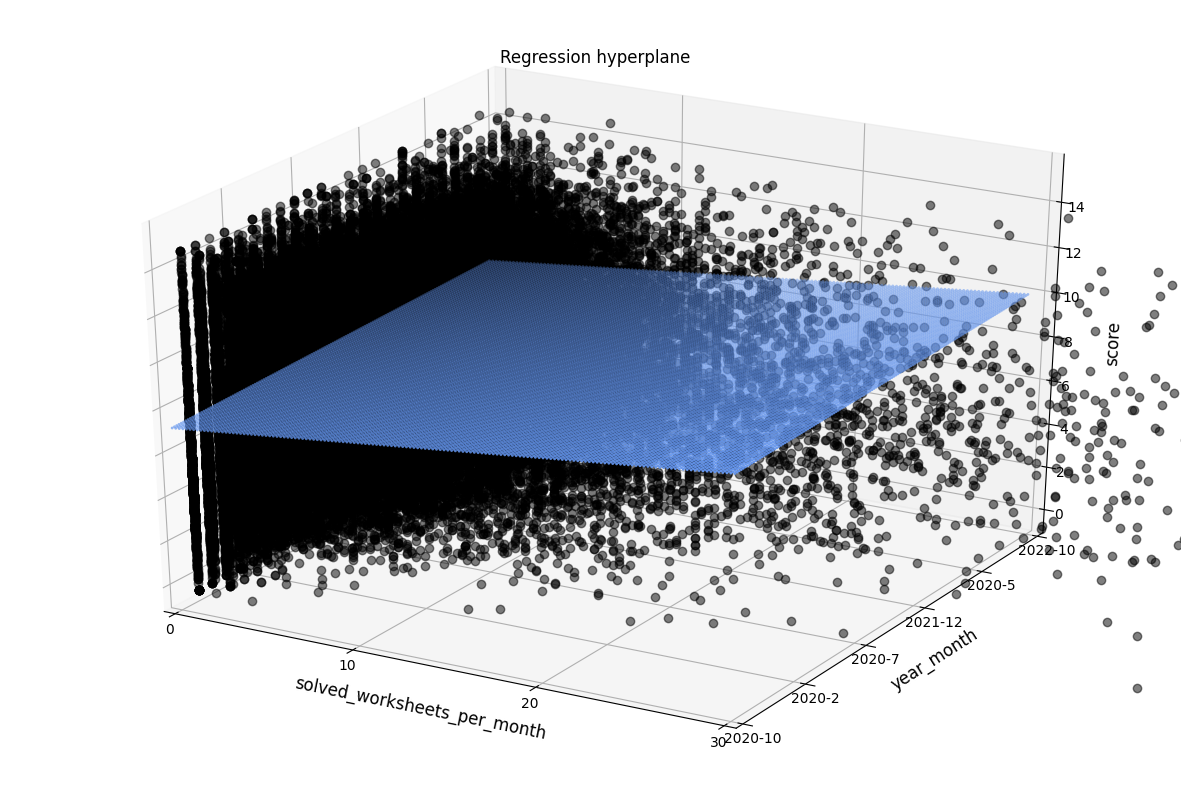

In [ ]:
df = std_ws_score_date

X = df[['s_ws.id', 'inverted_year_month']].values.reshape(-1,2)
Y = df['score']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(30, 0, 150)   # range of porosity values
y_pred = np.linspace(10, 34, 150)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=1, edgecolor='cornflowerblue')
ax.invert_xaxis()
ax.locator_params(nbins=5, axis='x')
ax.locator_params(nbins=5, axis='x')
ax.set_yticklabels(["2020-10","2020-2","2020-7","2021-12","2020-5","2022-10"])
ax.set_xlabel('solved_worksheets_per_month', fontsize=12)
ax.set_ylabel('year_month', fontsize=12)
ax.set_zlabel('score', fontsize=12)

plt.xlim(30,0)
plt.ylim(35,10)
plt.title("Regression hyperplane")
plt.tick_params(pad=-2)

ax.view_init(elev=28, azim=120)

fig.tight_layout()
print(model.intercept_, model.coef_)

경향성이 뚜렷한 학생들 15, 16, 23,24, 46, 48, 53, 56, 59, 77

In [ ]:
targets = list(long_students.iloc[[15, 16, 23,24, 46, 48, 53, 56, 59, 77],:]["student.id"])

In [ ]:
target_students = std_ws_score_date[std_ws_score_date["student.id"].isin(targets)].sort_values(by="student.id")
target_students

,Unnamed: 0,student.id,year_month,date,s_ws.id,score,inverted_year_month
304,304,I104256,202010,2020-10-23,5,6.310643,10
326,326,I104256,202210,2022-10-04,1,11.658458,34
325,325,I104256,202209,2022-09-13,1,11.617434,33
324,324,I104256,202208,2022-08-30,9,11.654510,32
323,323,I104256,202207,2022-07-28,2,11.653108,31
...,...,...,...,...,...,...,...
62880,62880,I56046,202011,2020-11-30,42,11.853232,11
62879,62879,I56046,202010,2020-10-06,3,6.413420,10
62899,62899,I56046,202209,2022-09-30,11,8.184208,33
62888,62888,I56046,202110,2021-10-24,6,8.180059,22


5.261410516753469 [0.09734558 0.12250144]


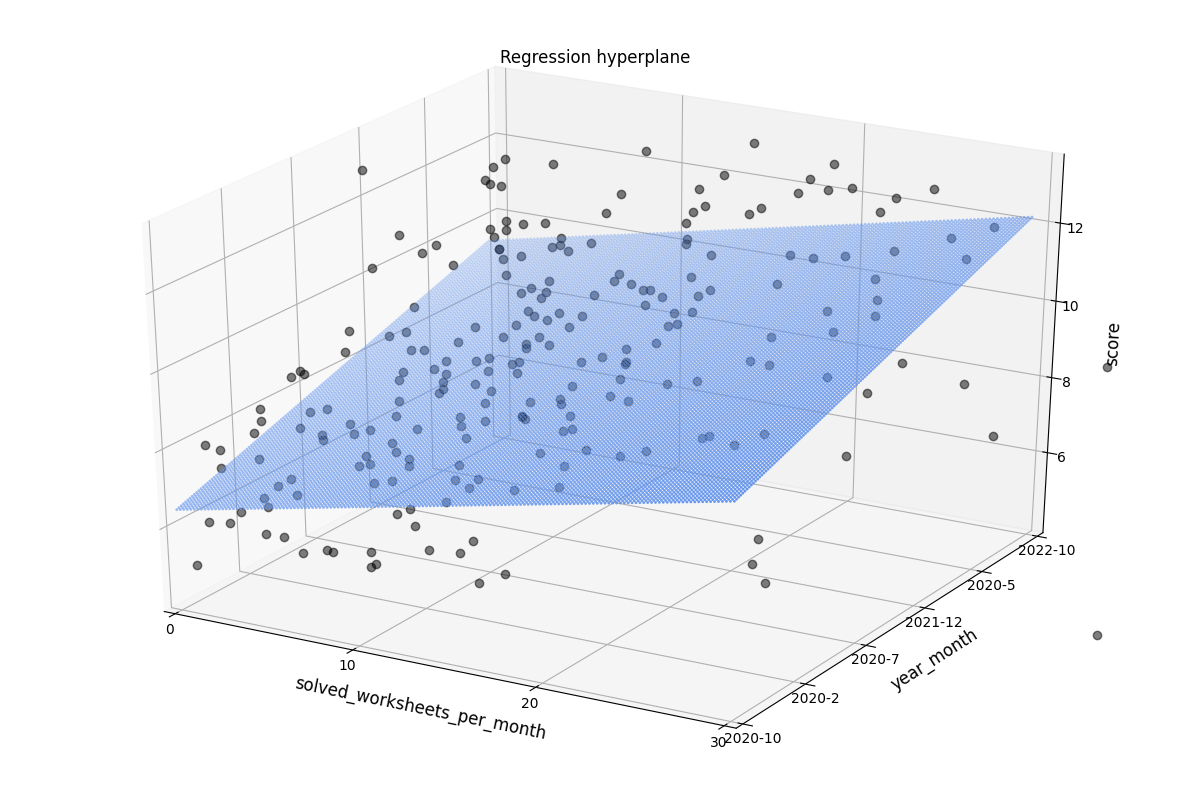

In [ ]:
df = target_students

X = df[['s_ws.id', 'inverted_year_month']].values.reshape(-1,2)
Y = df['score']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(30, 0, 150)   # range of porosity values
y_pred = np.linspace(10, 34, 150)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=1, edgecolor='cornflowerblue')
ax.invert_xaxis()
ax.locator_params(nbins=5, axis='x')
ax.locator_params(nbins=5, axis='x')
ax.set_yticklabels(["2020-10","2020-2","2020-7","2021-12","2020-5","2022-10"])
ax.set_xlabel('solved_worksheets_per_month', fontsize=12)
ax.set_ylabel('year_month', fontsize=12)
ax.set_zlabel('score', fontsize=12)

plt.xlim(30,0)
plt.ylim(35,10)
plt.title("Regression hyperplane")
plt.tick_params(pad=-2)

ax.view_init(elev=28, azim=120)

fig.tight_layout()
print(model.intercept_, model.coef_)

# Worksheet

## Date preparation

In [ ]:
worksheet = pd.read_csv("/content/drive/MyDrive/teamC/data/student_worksheet_scoring_preprocessed.csv")

ParserError: ignored

In [ ]:
# worksheet_ = worksheet[["Unnamed: 0","student_id","update_datetime","problem_id","problem_level","result"]]
worksheet_ = worksheet[["Unnamed: 0","student_id","update_datetime","problem_id"]]
worksheet_.columns=["Unnamed: 0","student.id", "date","problem.id"]
worksheet_['date'] = pd.to_datetime(worksheet_['date'])
worksheet_["date"] = worksheet_["date"].dt.strftime("%Y-%m-%d")
worksheet_['date'] = pd.to_datetime(worksheet_['date'])
worksheet_.to_csv("/content/drive/MyDrive/teamC/Geonwoo/worksheet_.csv")

NameError: ignored

In [ ]:
worksheet_score = pd.merge(worksheet_, result1, on=["student.id","date"], how="inner")
worksheet_score = worksheet_score[["student.id","problem.id","date","score"]].drop_duplicates()
worksheet_score = worksheet_score.groupby(["student.id","date","score"]).count().reset_index()
worksheet_score["date"] = pd.to_datetime(worksheet_score["date"])

worksheet_score_1 = worksheet_score.copy()
worksheet_score["date"] = worksheet_score["date"].astype("str") # 202011 형태
for i in range(len(worksheet_score["date"])):
  worksheet_score["date"][i] = int(worksheet_score["date"][i][0:4]+worksheet_score["date"][i][5:7])

worksheet_score_1["year_month"] = worksheet_score["date"]

worksheet_score_date = worksheet_score_1[["student.id","date","score","year_month"]].groupby(["student.id","year_month"]).max().reset_index()
worksheet_score_date["problem.id"] = worksheet_score[["student.id","date","problem.id"]].groupby(["student.id","date"]).sum().reset_index()["problem.id"]
worksheet_score_date = worksheet_score_date[["student.id","year_month","date","problem.id","score"]]
worksheet_score_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,student.id,year_month,date,problem.id,score
0,I100008,202011,2020-11-30,276,8.793955
1,I100008,202012,2020-12-30,1347,9.348183
2,I100008,202101,2021-01-30,330,9.377144
3,I100008,202102,2021-02-28,1814,9.592617
4,I100008,202103,2021-03-29,511,9.134290
...,...,...,...,...,...
69890,IB113,202101,2021-01-23,18,6.035998
69891,IB113,202103,2021-03-19,30,6.296970
69892,IB123,202102,2021-02-18,138,8.341492
69893,IB123,202103,2021-03-30,138,7.862458


In [ ]:
year_month = sorted(list(worksheet_score_date["year_month"].unique()))
inverted_year_month = list(range(10,35))

date = pd.DataFrame(year_month[1:], inverted_year_month).reset_index()
date.columns=["inverted_year_month", "year_month"]

In [ ]:
worksheet_score_date = pd.merge(worksheet_score_date, date, on="year_month", how="left")
worksheet_score_date = worksheet_score_date[["student.id","year_month","date","problem.id","score","inverted_year_month"]]

In [ ]:
worksheet_score_date = worksheet_score_date.dropna(axis=0)

In [ ]:
worksheet_score_date.to_csv("/content/drive/MyDrive/teamC/Geonwoo/worksheet_score_date.csv")

In [ ]:
worksheet_score_date = pd.read_csv("/content/drive/MyDrive/teamC/Geonwoo/worksheet_score_date.csv")

In [ ]:
worksheet_score_date

,Unnamed: 0,student.id,year_month,date,problem.id,score,inverted_year_month
0,0,I100008,202011,2020-11-30,276,8.793955,11.0
1,1,I100008,202012,2020-12-30,1347,9.348183,12.0
2,2,I100008,202101,2021-01-30,330,9.377144,13.0
3,3,I100008,202102,2021-02-28,1814,9.592617,14.0
4,4,I100008,202103,2021-03-29,511,9.134290,15.0
...,...,...,...,...,...,...,...
69379,69890,IB113,202101,2021-01-23,18,6.035998,13.0
69380,69891,IB113,202103,2021-03-19,30,6.296970,15.0
69381,69892,IB123,202102,2021-02-18,138,8.341492,14.0
69382,69893,IB123,202103,2021-03-30,138,7.862458,15.0


## Visualization

6.950849015377649 [0.00351876 0.02096169]


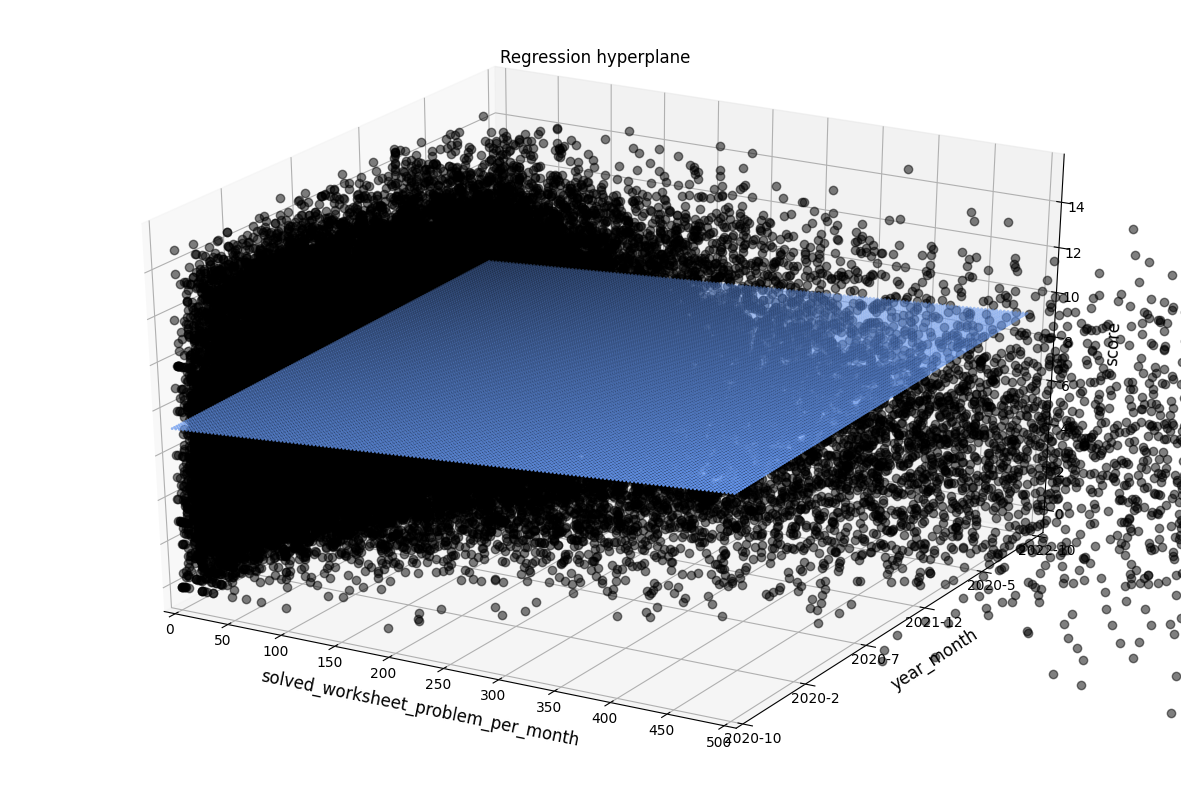

In [ ]:
df = worksheet_score_date

X = df[['problem.id', 'inverted_year_month']].values.reshape(-1,2)
Y = df['score']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(500, 0, 150)   # range of porosity values
y_pred = np.linspace(10, 34, 150)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=1, edgecolor='cornflowerblue')
ax.invert_xaxis()
ax.locator_params(nbins=10, axis='x')
ax.locator_params(nbins=10, axis='x')
ax.set_yticklabels(["2020-10","2020-2","2020-7","2021-12","2020-5","2022-10"])
ax.set_xlabel('solved_worksheet_problem_per_month', fontsize=12)
ax.set_ylabel('year_month', fontsize=12)
ax.set_zlabel('score', fontsize=12)

plt.xlim(500,0)
plt.ylim(35,10)
plt.title("Regression hyperplane")
plt.tick_params(pad=-2)

ax.view_init(elev=28, azim=120)

fig.tight_layout()
print(model.intercept_, model.coef_)

# Workbook

## Data preparation

In [ ]:
workbook = pd.read_csv("/content/drive/MyDrive/teamC/data/student_workbook_scoring_preprocessed.csv")

In [ ]:
workbook = workbook.drop([4495470]).sort_values(by="update_datetime")

In [ ]:
workbook.head()

,Unnamed: 0,student_id,workbook_problem_id,result,problem_level,update_datetime,grade,workbook_level
16534,16534,I1,37760,CORRECT,3,2015-01-27 22:20:23,수학 I,3
16533,16533,I1,37759,WRONG,3,2015-01-27 22:20:23,수학 I,3
16535,16535,I1,37761,CORRECT,4,2015-01-27 22:20:23,수학 I,3
16536,16536,I1,37762,CORRECT,3,2015-01-27 22:20:23,수학 I,3
16532,16532,I1,37758,WRONG,3,2015-01-27 22:20:23,수학 I,3


In [ ]:
workbook_ = workbook[["Unnamed: 0","student_id","update_datetime","workbook_problem_id"]]
workbook_.columns=["Unnamed: 0","student.id", "date","problem.id"]
workbook_['date'] = pd.to_datetime(workbook_['date'])
workbook_["date"] = workbook_["date"].dt.strftime("%Y-%m-%d")
workbook_['date'] = pd.to_datetime(workbook_['date'])
workbook_
workbook_.to_csv("/content/drive/MyDrive/teamC/Geonwoo/workbook_.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
workbook_ = pd.read_csv("/content/drive/MyDrive/teamC/Geonwoo/workbook_.csv")
workbook_

,Unnamed: 0,Unnamed: 0.1,studenti.d,date,problem.id
0,16534,16534,I1,2015-01-27,37760
1,16533,16533,I1,2015-01-27,37759
2,16535,16535,I1,2015-01-27,37761
3,16536,16536,I1,2015-01-27,37762
4,16532,16532,I1,2015-01-27,37758
...,...,...,...,...,...
11012096,10358241,10358241,I847250,2022-10-14,27848441
11012097,10358240,10358240,I847250,2022-10-14,27848440
11012098,10358239,10358239,I847250,2022-10-14,27848439
11012099,10358242,10358242,I847250,2022-10-14,27848442


In [ ]:
workbook_ = workbook_[["Unnamed: 0","studenti.d","date","problem.id"]]
workbook_.columns=["Unnamed: 0","student.id","date","problem.id"]
workbook_

,Unnamed: 0,student.id,date,problem.id
0,16534,I1,2015-01-27,37760
1,16533,I1,2015-01-27,37759
2,16535,I1,2015-01-27,37761
3,16536,I1,2015-01-27,37762
4,16532,I1,2015-01-27,37758
...,...,...,...,...
11012096,10358241,I847250,2022-10-14,27848441
11012097,10358240,I847250,2022-10-14,27848440
11012098,10358239,I847250,2022-10-14,27848439
11012099,10358242,I847250,2022-10-14,27848442


In [ ]:
result1.head()

,student.id,date,score
0,I100008,2020-11-07,3.954545
1,I100008,2020-11-14,3.958965
2,I100008,2020-11-16,4.702381
3,I100008,2020-11-18,5.848527
4,I100008,2020-11-20,5.802536


In [ ]:
workbook_score = pd.merge(workbook_, result1, on=["student.id","date"], how="inner")
workbook_score = workbook_score[["student.id","problem.id","date","score"]].drop_duplicates()
workbook_score = workbook_score.groupby(["student.id","date","score"]).count().reset_index()
workbook_score["date"] = pd.to_datetime(workbook_score["date"])

workbook_score_1 = workbook_score.copy()
workbook_score["date"] = workbook_score["date"].astype("str") # 202011 형태
for i in range(len(workbook_score["date"])):
  workbook_score["date"][i] = int(workbook_score["date"][i][0:4]+workbook_score["date"][i][5:7])

workbook_score_1["year_month"] = workbook_score["date"]

workbook_score_date = workbook_score_1[["student.id","date","score","year_month"]].groupby(["student.id","year_month"]).max().reset_index()
workbook_score_date["problem.id"] = workbook_score[["student.id","date","problem.id"]].groupby(["student.id","date"]).sum().reset_index()["problem.id"]
workbook_score_date = workbook_score_date[["student.id","year_month","date","problem.id","score"]]
workbook_score_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,student.id,year_month,date,problem.id,score
0,I101947,202104,2021-04-26,40,9.559475
1,I102900,202106,2021-06-22,190,11.540293
2,I102901,202104,2021-04-22,115,11.001577
3,I104139,202103,2021-03-08,126,9.233333
4,I104139,202108,2021-08-23,98,12.525000
...,...,...,...,...,...
1803,I98614,202109,2021-09-01,8,11.200575
1804,I98614,202111,2021-11-21,36,10.907304
1805,I98638,202203,2022-03-18,38,12.055595
1806,I98638,202204,2022-04-06,55,12.030768


In [ ]:
workbook_score_date.to_csv("/content/drive/MyDrive/teamC/Geonwoo/workbook_score_date.csv")

In [ ]:
workbook_score_date = pd.read_csv("/content/drive/MyDrive/teamC/Geonwoo/workbook_score_date.csv")

In [ ]:
workbook_score_date.sort_values(by="year_month")

,Unnamed: 0,student.id,year_month,date,problem.id,score
1490,1490,I38137,202010,2020-10-19,100,6.826019
91,91,I150449,202010,2020-10-22,6,10.000000
32,32,I121382,202010,2020-10-16,149,9.727273
77,77,I142609,202010,2020-10-16,100,11.485806
1724,1724,I74247,202010,2020-10-04,19,9.578947
...,...,...,...,...,...,...
221,221,I180589,202210,2022-10-12,96,9.635993
1389,1389,I350877,202210,2022-10-02,13,5.103381
1735,1735,I793219,202210,2022-10-06,169,8.280092
1769,1769,I855791,202210,2022-10-08,24,4.231746


In [ ]:
year_month = sorted(list(workbook_score_date["year_month"].unique()))
inverted_year_month = list(range(10,35))

date = pd.DataFrame(year_month, inverted_year_month).reset_index()
date.columns=["inverted_year_month", "year_month"]

workbook_score_date = pd.merge(workbook_score_date, date, on="year_month", how="left")
workbook_score_date = workbook_score_date[["student.id","year_month","date","problem.id","score","inverted_year_month"]]

In [ ]:
workbook_score_date

,student.id,year_month,date,problem.id,score,inverted_year_month
0,I101947,202104,2021-04-26,40,9.559475,16
1,I102900,202106,2021-06-22,190,11.540293,18
2,I102901,202104,2021-04-22,115,11.001577,16
3,I104139,202103,2021-03-08,126,9.233333,15
4,I104139,202108,2021-08-23,98,12.525000,20
...,...,...,...,...,...,...
1803,I98614,202109,2021-09-01,8,11.200575,21
1804,I98614,202111,2021-11-21,36,10.907304,23
1805,I98638,202203,2022-03-18,38,12.055595,27
1806,I98638,202204,2022-04-06,55,12.030768,28


## Visualization

7.776407667356258 [0.00320786 0.00167941]


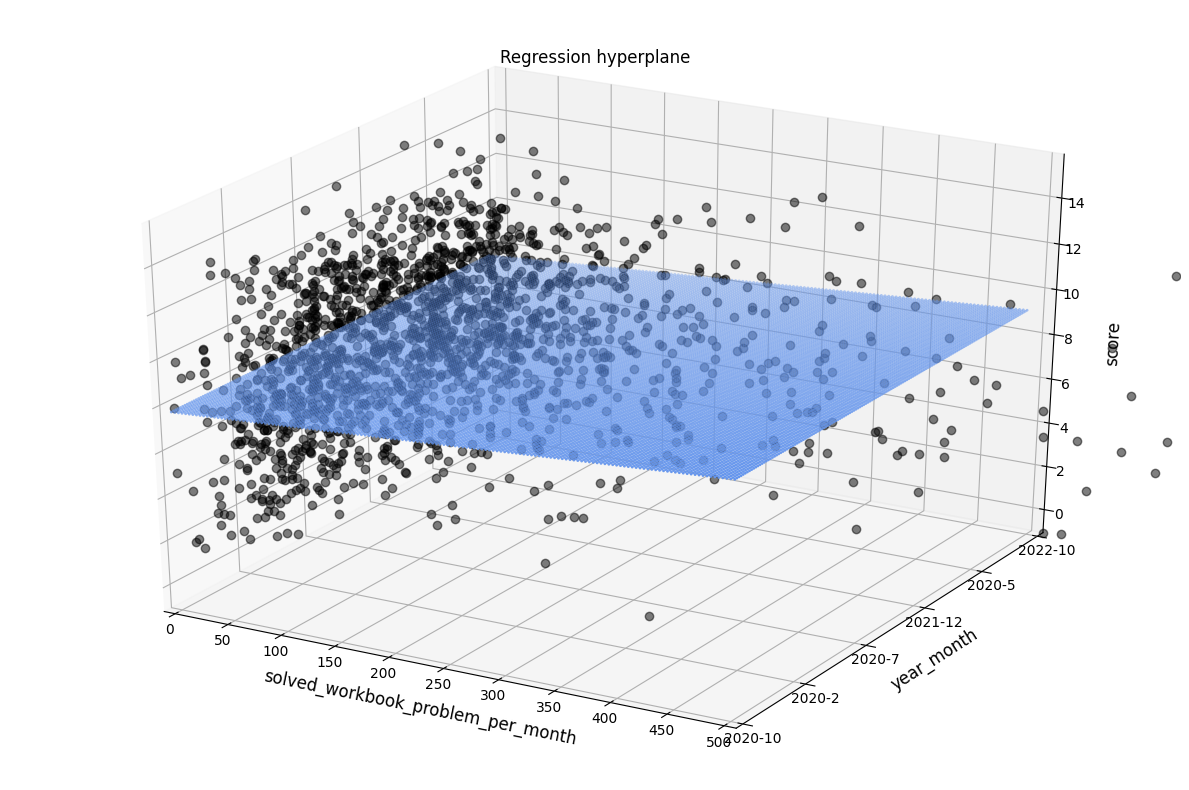

In [ ]:
df = workbook_score_date


X = df[['problem.id', 'inverted_year_month']].values.reshape(-1,2)
Y = df['score']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(500, 0, 150)   # range of porosity values
y_pred = np.linspace(10, 34, 150)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=1, edgecolor='cornflowerblue')
ax.invert_xaxis()
ax.locator_params(nbins=10, axis='x')
ax.locator_params(nbins=10, axis='x')
ax.set_yticklabels(["2020-10","2020-2","2020-7","2021-12","2020-5","2022-10"])
ax.set_xlabel('solved_workbook_problem_per_month', fontsize=12)
ax.set_ylabel('year_month', fontsize=12)
ax.set_zlabel('score', fontsize=12)

plt.xlim(500,0)
plt.ylim(35,10)
plt.title("Regression hyperplane")
plt.tick_params(pad=-2)

ax.view_init(elev=28, azim=120)

fig.tight_layout()
print(model.intercept_, model.coef_)

# Conclusion

In [ ]:
def worksheet_effect(the_number_of_solved_problem_per_month):
  num = the_number_of_solved_problem_per_month
  y20 = 6.950849015377649
  y22 = 6.950849015377649 + num*0.00351876 + 35*0.02096169
  growth = (y22 - y20) / y20
  print(round(growth*100,2),"%") 

In [ ]:
worksheet_effect(500)

35.87 %


In [ ]:
def workbook_effect(the_number_of_solved_problem_per_month):
  num = the_number_of_solved_problem_per_month
  y20 = 7.776407667356258
  y22 = 7.776407667356258 + num*0.00320786 + 35*0.00167941
  growth = (y22 - y20) / y20
  print(round(growth*100,2),"%") 

In [ ]:
workbook_effect(500)

21.38 %


worksheet

6.9508 + 500 * 0.0035 + 35 * 0.0209 = 9.4438

(9.4438 - 6.9508) / 6.9508 = 0.3586

=> 월 500문제 풀었을 때 기준 2020-10 대비 2020-12에 score 35% 향상

workbook

7.7764 + 500 * 0.0032 + 35 * 0.0016 = 9.4391

(9.4391 - 7.7764) / 7.7764 = 0.2138

=> 월 500문제 풀었을 때 기준 2020-10 대비 2022-10에 score 약 21% 향상

등급별로 workbook worksheet 비중 특히 저득점

저득점 학생들이 worksheet 많이 풀더라 하면 같이 ㄱㄱ

2020-10 score에 따라 book sheet 비율

total.csv

승진 메모
worksheet 최소 3달 정도는 푼 학생들만?
worksheet이랑 workbook 표본 수 차이 언급

등급 별로 worksheet, workbook 푸는 비율 다른지?
worksheet을 오답 노트 용도로 쓰는지??

저득점자가 worksheet을 더 많이 풀었다면 최종적으로 점수가 비슷해졌기 때문에 
worksheet이 저득점자의 성적 향상에 기여했고, 학원 선생님들이 오답 노트로 만들어서 푼 게 유의미해 보인다

문제 처음 푼 시작 시점 등급이 중요
그런데 있는가? 지금 만들고 있다 

한빈 -> 데이터 -> total groupby csv